# Asunciones Regresión Lineal

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene

plt.rcParams["figure.figsize"] = (10,8) 

pd.options.display.max_columns=None
pd.options.display.float_format = '{:.2f}'.format 
np.set_printoptions(suppress=True)

In [3]:
df = pd.read_csv('../Datos/EDA_vinos.csv', index_col = 0)
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,mnt_total,mnt_total_sin_vino
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,982
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,16


`En este módulo aprenderemos qué es un ANOVA y qué asunciones deben cumplirse para hacer un análisis de este tipo.`

Sin embargo, no nos podemos poner a hacer nuestras operaciones a lo loco. Antes de hacer nada, tenemos que comprobar una serie de asunciones. ¿Cuáles son?
* Los datos deben ser normales -> test de normalidad


In [4]:
# La comprobación de la normalidad la haremos sobre la variable que nos resulta interesante: 'mntwines' (quizás más adelante hagamos el análisis con 'mntmeatproducts')

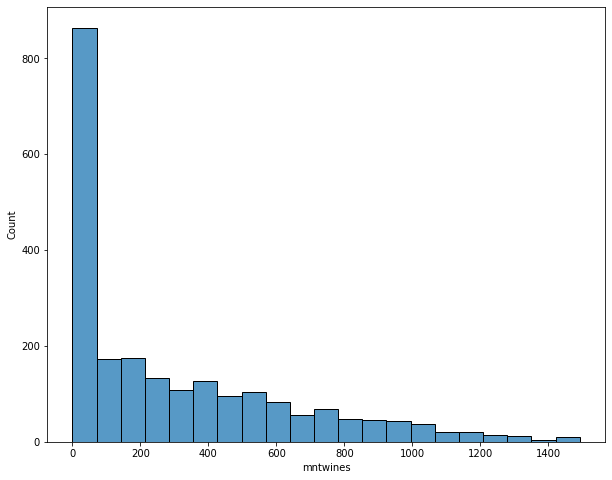

In [5]:
# Empezamos a analizarlo visualmente
sns.histplot(df['mntwines']);

In [6]:
# Comprobamos el tamaño de nuestro df. Si no supera los 5000 registros, usaremos el test de shapiro.
df.shape

(2240, 29)

In [7]:
# Aunque de forma visual interpretamos claramente que no tenemos una distribución normal, hacemos el test de shapiro para comprobar la normalidad
stats.shapiro(df['mntwines'])

ShapiroResult(statistic=0.8381438255310059, pvalue=5.7032847498020055e-43)

> Nuestro p valor es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que nuestra variable tiene una distribución normal

* Las variables deben ser independientes -> correlación


`Vamos a comprobar que nuestras variables predictoras son independientes.`

`Como ya hemos hecho un heatmap, vamos a comprobar la independencia de forma analítica con un crosstab de chi cuadrado`

In [8]:
# Sacamos una selección de columnas para analizar la independencia entre ellas
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response', 'mnt_total',
       'mnt_total_sin_vino'],
      dtype='object')

In [9]:
lista_columnas = ['year_birth', 'education', 'marital_status', 'income', 'kidhome',
                  'teenhome', 'mntfishproducts']

In [10]:
# Generamos un for loop que vaya comparando por pares y que elimine duplicados
for i in lista_columnas:
    repes=[]
    for j in lista_columnas:
        if i != j:
            if i not in repes:
                print(i, '...', j)

        repes.append(j)   

education ... year_birth
marital_status ... year_birth
marital_status ... education
income ... year_birth
income ... education
income ... marital_status
kidhome ... year_birth
kidhome ... education
kidhome ... marital_status
kidhome ... income
teenhome ... year_birth
teenhome ... education
teenhome ... marital_status
teenhome ... income
teenhome ... kidhome
mntfishproducts ... year_birth
mntfishproducts ... education
mntfishproducts ... marital_status
mntfishproducts ... income
mntfishproducts ... kidhome
mntfishproducts ... teenhome


In [11]:
# Hacemos una prueba de chi cuadrado para ver qué resultados nos interesa extraer para todas las combinaciones
crosstab, test_results, expected = rp.crosstab(df['year_birth'], df['education'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [12]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 232.0) =,428.14
1,p-value =,0.00
2,Cramer's V =,0.22


In [13]:
# Como solo nos interesa el p_valor, extraemos ese valor con un iloc
test_results.iloc[1,1]

0.0

In [14]:
# Ejecutamos nuestro bucle for que nos irá calculando el test de chi cuadrado por pares de columnas
for i in lista_columnas:
    repes=[]
    for j in lista_columnas:
        if i != j:
            if i not in repes:
                crosstab, test_results, expected = rp.crosstab(df[i], df[j],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
                print(i, '---', j,'--p_valor: ', test_results.iloc[1,1])
        repes.append(j)   

education --- year_birth --p_valor:  0.0
marital_status --- year_birth --p_valor:  0.0
marital_status --- education --p_valor:  0.5026
income --- year_birth --p_valor:  0.0
income --- education --p_valor:  0.0
income --- marital_status --p_valor:  1.0
kidhome --- year_birth --p_valor:  0.0
kidhome --- education --p_valor:  0.0125
kidhome --- marital_status --p_valor:  0.0935
kidhome --- income --p_valor:  0.0
teenhome --- year_birth --p_valor:  0.0
teenhome --- education --p_valor:  0.0
teenhome --- marital_status --p_valor:  0.0005
teenhome --- income --p_valor:  0.0
teenhome --- kidhome --p_valor:  0.0019
mntfishproducts --- year_birth --p_valor:  0.0
mntfishproducts --- education --p_valor:  0.0029
mntfishproducts --- marital_status --p_valor:  0.0
mntfishproducts --- income --p_valor:  0.0
mntfishproducts --- kidhome --p_valor:  0.0
mntfishproducts --- teenhome --p_valor:  0.0001


>Si sabemos que un p_valor > 0,05 indica que son independientes, sólo tres de nuestras relaciones entre variables son idependientes:
>
>* marital_status --- education
>
>* income --- marital_status
>
>* kidhome --- marital_status
> 
> El resto de nuestras variables sí muestran dependencia según este test. Porque muchas veces las correlaciones no son causales, y lo iremos estudiando

* Homogeneidad de las varianzas o heterocedasticidad -> test de heterocedasticidad


`Vamos a testear la homocedasticidad entre nuestra variable respuesta y las que hemos seleccionado previamente`

In [15]:

# Veamos cuales son numéricas y cuales categóricas y las separamos en dos dataframes
df_sel = df[lista_columnas]
df_sel.dtypes

year_birth           int64
education           object
marital_status      object
income             float64
kidhome              int64
teenhome             int64
mntfishproducts      int64
dtype: object

In [16]:
# Añadimos nuestra columna respuesta al df_sel para poder comparar la homocedasticidad con el resto de las variables
df_sel['mntwines'] = df['mntwines']

/tmp/ipykernel_1556/2562338320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['mntwines'] = df['mntwines']


In [17]:
# Creamos un dataframe solo con las columnas categóricas
categoricas = df_sel.select_dtypes(object)
categoricas.head(2)

,education,marital_status
0,Graduation,Single
1,Graduation,Single


`Primero lo haremos visualmente con nuestras columnas categóricas`

In [19]:
# Vemos cuantas categorías tenemos
categoricas['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

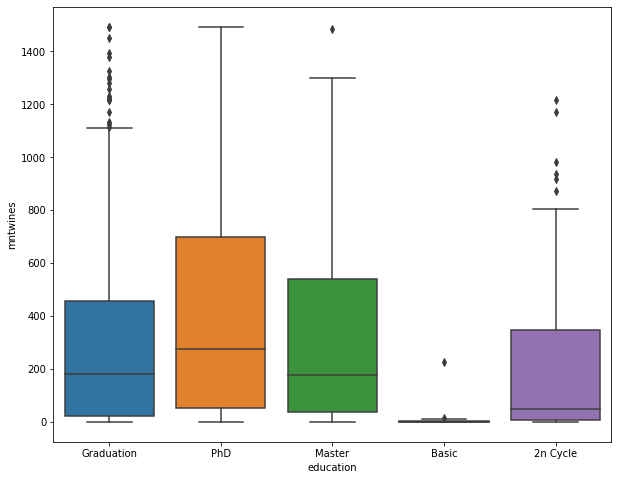

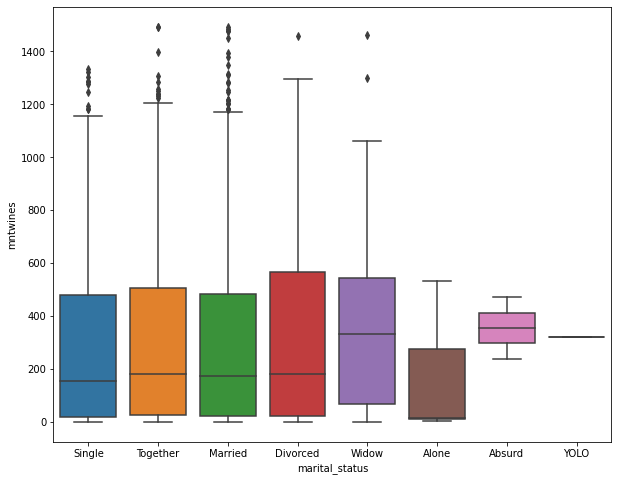

In [20]:
# Graficamos
for i, col in enumerate(categoricas.columns):
    fig, axes = plt.subplots()
    sns.boxplot( x= categoricas[col], y = df_sel['mntwines']);

>Estamos observando:
>* La cantidad de dinero gastado en vinos según nivel de estudios.
>* Y la cantidad de dinero gastado en vinos segun el estado civil.
>
>Las medianas son bastante dispares en cambos casos, algo a tener en cuenta para nuestro proceso ANOVA.

`Calculamos de forma numérica la homocedasticidad de las columnas categóricas con el test de levene`

In [23]:
# Tenemos que extraer los valores de nuestra columna respuesta `mntwines` que corresponden a cada categoría de cada columna categórica.
# Empezamos por la columna 'education'
graduation = df_sel[df_sel['education']== 'Graduation']['mntwines']
phd = df_sel[df_sel['education']== 'PhD']['mntwines']
master = df_sel[df_sel['education']== 'Master']['mntwines']
basic = df_sel[df_sel['education']== 'Basic']['mntwines']
cycle = df_sel[df_sel['education']== '2n Cycle']['mntwines']

In [24]:
levene_test = stats.levene(graduation, phd, master, basic, cycle)

In [25]:
levene_test

LeveneResult(statistic=31.644424222988334, pvalue=1.1187386514102212e-25)

> El p_valor es < 0.05, por lo que no podemos rechazar la hpótesis nula de que nuestra columna tiene una distribución con varianzas similares, es decir, es homocedástica

In [26]:
# Vamos con la columna marital status
df_sel['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [27]:
# Vemos que tenemos dos categorías que no nos aportan información, así que las agruparemos en una, llamada unknown
df_sel['marital_status'] = df_sel['marital_status'].apply(lambda x: 'Unknown' if x == 'Absurd' or x == 'YOLO' else x)

/tmp/ipykernel_1556/3569198511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['marital_status'] = df_sel['marital_status'].apply(lambda x: 'Unknown' if x == 'Absurd' or x == 'YOLO' else x)


In [29]:
# Comprobamos
df_sel['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Unknown'], dtype=object)

In [30]:
# No tendremos en cuenta la categoría 
single = df_sel[df_sel['marital_status']== 'Single']['mntwines']
together = df_sel[df_sel['marital_status']== 'Together']['mntwines']
married = df_sel[df_sel['marital_status']== 'Married']['mntwines']
divorced = df_sel[df_sel['marital_status']== 'Divorced']['mntwines']
widow = df_sel[df_sel['marital_status']== 'Widow']['mntwines']
alone = df_sel[df_sel['marital_status']== 'Alone']['mntwines']
unknown = df_sel[df_sel['marital_status']== 'Unknown']['mntwines']

In [31]:
levene_test2 = stats.levene(single, together, married, divorced, widow, alone, unknown)
levene_test2

LeveneResult(statistic=0.6851690743923168, pvalue=0.6616699233542647)

> En este caso el p_valor es > 0.05, por lo que concluimos que nuestra columna no tiene homogeneidad de varianzas.
>
> Lo tendremos en cuenta de cara a los próximos pasos

`Calculamos de forma gráfica la homocedasticidad de las columnas numéricas con el regplot`

In [32]:
# Clasificamos
numericas = df_sel.select_dtypes(np.number)
numericas.head(2)

,year_birth,income,kidhome,teenhome,mntfishproducts,mntwines
0,1957,58138.00,0,0,172,635
1,1954,46344.00,1,1,2,11
